In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-21.9812545717201 176.3336672425935
25.65045994536868 -101.75307370832782
67.44403618116215 -65.76930683103151
-81.03930833762176 -9.716199659808694
-4.253710337317628 -179.96043338526613
42.252033728213405 -103.18927180376984
-55.657530835325765 42.18356366627458
-67.90518122862514 -179.27024132547274
45.99628540343596 -78.97668476505505
-66.97341670237243 178.70096510299567
15.072297906049045 99.71671379923174
-27.004693440086463 -79.50886955381304
70.89571465361581 -145.64929900159638
-54.99478519374415 19.71829220314271
45.908340370909144 -42.22782689280169
-61.06479589499669 -142.78735849353652
64.12839497176876 -84.19597713352151
47.83387425754131 84.6528219037134
-44.14066074611844 -55.96160415632659
-84.72455799758038 -56.75152874037789
-37.587874823993225 170.58103557207414
-26.472095887213435 -161.8062279347545
55.58503367605846 86.50523317273388
62.198890331941044 -146.76171647065163
-67.12897452153226 158.53607109568355
45.063728235069334 -108.78509219802646
-29.75864926680

-14.970622247316584 -172.61929273006336
43.00221634207696 85.11036553548252
36.97126980404228 113.13690689044432
-49.32468958719096 -54.814522551788144
26.236693237429563 172.44003297718683
58.77242539544736 -71.23874802794882
74.2468115011184 91.6059867615748
-9.287795414017538 131.057519393434
-7.35829487823699 -7.241448530000895
-58.108725323084656 8.871042858413972
25.15507654422578 -143.35788233321833
-39.03770937255556 21.24746389830301
-15.165546860178495 127.54179883675044
25.072795597751607 82.98343628491608
-29.55156987385204 68.54684581266065
43.63222150644623 -35.7770354185993
-76.2659039354547 113.83868026543746
43.77160882572025 20.042191990193032
81.11875578481687 104.93802255069306
-18.39342097275447 -87.73340033160436
-40.830385516020606 54.83848910655399
-59.392699286429846 -38.90154306531184
-78.02898564203785 13.106608333708266
-87.88480393548339 122.38651265291452
62.86637277320321 -11.430329563130528
36.849236536290334 14.469477376720846
-26.74208132759877 -95.734

46.89962671014257 -60.178721025459765
-9.84106148561716 60.20074748594723
8.865170326286659 -171.4253783968506
-65.4645433628149 -174.82746517646405
6.425514123933866 100.71558219400276
-4.775001632127314 -109.15621064480823
-59.70543102150998 9.213600522070237
46.60883566036921 170.98845352400235
86.62836010181474 48.730310024256795
36.97681496676613 88.53366524103933
80.81436649075923 -177.4874519679303
55.68642002843208 -41.05048288840004
-42.230908474410036 171.3478331818672
-6.5135305409948785 -73.69425987559924
-38.614081854979645 -118.92520157211581
51.45394506980571 -96.92053309863333
-26.551139765263322 42.494298434527906
-38.748594021675196 106.21905198126757
-79.6508894106286 86.60877724015143
54.71095464491131 51.36172637361068
-54.59468267414566 -28.30202155560619
45.963192669331534 -129.95415717396304
68.98795544806578 81.00198964818657
-17.878625667020415 -112.18244563098906
-16.461812942919167 3.222593994638828
-19.568521904580265 -82.30399189913584
69.66274664202857 -3

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [7]:
#Import our dependencies and initialize counters and an empty list that will hold the weather data.

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#Loop through the cities list.

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isangel
Processing Record 2 of Set 1 | general cepeda
Processing Record 3 of Set 1 | pangnirtung
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 1 | scottsbluff
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | powassan
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | chai nat
Processing Record 12 of Set 1 | coquimbo
Processing Record 13 of Set 1 | fairbanks
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 18 of Set 1 | zaysan
Processing Record 19 of Set 1 | necochea
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | ahipara
Processing Record 2

Processing Record 41 of Set 4 | samoded
Processing Record 42 of Set 4 | martapura
Processing Record 43 of Set 4 | makakilo city
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | katsuura
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | nanortalik
Processing Record 49 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 50 of Set 4 | bathsheba
Processing Record 1 of Set 5 | hazaribag
Processing Record 2 of Set 5 | kungurtug
Processing Record 3 of Set 5 | kodiak
Processing Record 4 of Set 5 | cabedelo
Processing Record 5 of Set 5 | stephenville crossing
Processing Record 6 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 5 | tocopilla
Processing Record 8 of Set 5 | tasiilaq
Processing Record 9 of Set 5 | kortkeros
Processing Record 10 of Set 5 | grants
Processing Record 11 of Set 5 | kathmandu
Processing Record 12 of Set 5 | lebu
Processing Record 13 of Set 5

Processing Record 32 of Set 8 | nam tha
City not found. Skipping...
Processing Record 33 of Set 8 | miramar
Processing Record 34 of Set 8 | santa maria
Processing Record 35 of Set 8 | ponta do sol
Processing Record 36 of Set 8 | de-kastri
Processing Record 37 of Set 8 | bonfim
Processing Record 38 of Set 8 | sao felix do xingu
Processing Record 39 of Set 8 | ilulissat
Processing Record 40 of Set 8 | arauca
Processing Record 41 of Set 8 | norden
Processing Record 42 of Set 8 | longlac
City not found. Skipping...
Processing Record 43 of Set 8 | tanout
Processing Record 44 of Set 8 | mizdah
Processing Record 45 of Set 8 | cananeia
Processing Record 46 of Set 8 | mehamn
Processing Record 47 of Set 8 | namibe
Processing Record 48 of Set 8 | kharp
Processing Record 49 of Set 8 | leningradskiy
Processing Record 50 of Set 8 | thongwa
Processing Record 1 of Set 9 | moranbah
Processing Record 2 of Set 9 | langres
Processing Record 3 of Set 9 | yeniseysk
Processing Record 4 of Set 9 | doka
Proces

Processing Record 24 of Set 12 | rungata
City not found. Skipping...
Processing Record 25 of Set 12 | zhangjiakou
Processing Record 26 of Set 12 | hualmay
Processing Record 27 of Set 12 | ohangaron
Processing Record 28 of Set 12 | omsukchan
Processing Record 29 of Set 12 | mariana
Processing Record 30 of Set 12 | jiangkou
Processing Record 31 of Set 12 | tamiahua
Processing Record 32 of Set 12 | gremyachye
City not found. Skipping...
Processing Record 33 of Set 12 | bela
Processing Record 34 of Set 12 | juba
Processing Record 35 of Set 12 | cowra
Processing Record 36 of Set 12 | vrangel
Processing Record 37 of Set 12 | aripuana
Processing Record 38 of Set 12 | tacuarembo
Processing Record 39 of Set 12 | paragominas
Processing Record 40 of Set 12 | waipawa
Processing Record 41 of Set 12 | sale
Processing Record 42 of Set 12 | parchim
Processing Record 43 of Set 12 | baillif
Processing Record 44 of Set 12 | burnie
-----------------------------
Data Retrieval Complete      
--------------

In [16]:
len(city_data)

557

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Isangel,-19.5500,169.2667,78.91,94,75,14.97,VU,2022-05-20 22:40:29
1,General Cepeda,25.3833,-101.4500,94.06,8,35,19.57,MX,2022-05-20 22:47:45
2,Pangnirtung,66.1451,-65.7125,34.23,89,100,1.59,CA,2022-05-20 22:39:12
3,Cape Town,-33.9258,18.4232,55.11,83,20,1.14,ZA,2022-05-20 22:47:46
4,Scottsbluff,41.8666,-103.6672,48.29,43,100,21.85,US,2022-05-20 22:43:02
5,East London,-33.0153,27.9116,61.12,74,100,8.16,ZA,2022-05-20 22:38:02
6,Vaini,-21.2000,-175.2000,80.76,78,20,6.91,TO,2022-05-20 22:47:46
7,Powassan,46.0334,-79.3496,77.86,74,99,15.99,CA,2022-05-20 22:47:46
8,Kaitangata,-46.2817,169.8464,45.97,78,77,20.71,NZ,2022-05-20 22:41:35
9,Chai Nat,15.1167,100.1000,81.05,80,100,8.72,TH,2022-05-20 22:47:47


In [17]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        557 non-null    object 
 1   Lat         557 non-null    float64
 2   Lng         557 non-null    float64
 3   Max Temp    557 non-null    float64
 4   Humidity    557 non-null    int64  
 5   Cloudiness  557 non-null    int64  
 6   Wind Speed  557 non-null    float64
 7   Country     557 non-null    object 
 8   Date        557 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 39.3+ KB


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Isangel,VU,2022-05-20 22:40:29,-19.5500,169.2667,78.91,94,75,14.97
1,General Cepeda,MX,2022-05-20 22:47:45,25.3833,-101.4500,94.06,8,35,19.57
2,Pangnirtung,CA,2022-05-20 22:39:12,66.1451,-65.7125,34.23,89,100,1.59
3,Cape Town,ZA,2022-05-20 22:47:46,-33.9258,18.4232,55.11,83,20,1.14
4,Scottsbluff,US,2022-05-20 22:43:02,41.8666,-103.6672,48.29,43,100,21.85
5,East London,ZA,2022-05-20 22:38:02,-33.0153,27.9116,61.12,74,100,8.16
6,Vaini,TO,2022-05-20 22:47:46,-21.2000,-175.2000,80.76,78,20,6.91
7,Powassan,CA,2022-05-20 22:47:46,46.0334,-79.3496,77.86,74,99,15.99
8,Kaitangata,NZ,2022-05-20 22:41:35,-46.2817,169.8464,45.97,78,77,20.71
9,Chai Nat,TH,2022-05-20 22:47:47,15.1167,100.1000,81.05,80,100,8.72


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

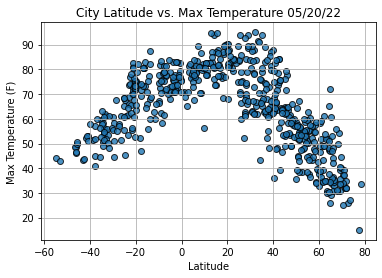

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

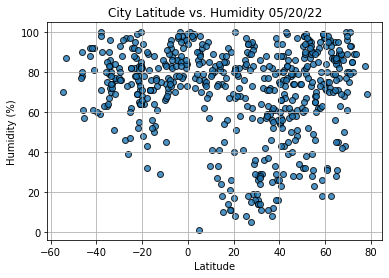

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

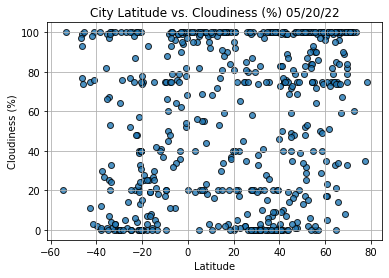

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

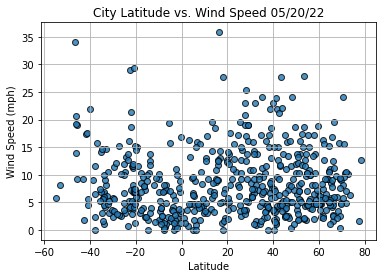

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()